In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

In [188]:
df = pd.read_csv("data/close_adjusted_17.csv")

# Convert 'date' to datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Set 'date' as index
df.set_index("date", inplace=True)

In [189]:
#Getting rid of missing values
df = df.ffill().dropna()

In [190]:
df.head()

,CSCO.close,UAL.close,TROW.close,ISRG.close,PRGO.close,TPR.close,DVN.close,MRO.close,BA.close,VRTX.close,...,TSS.close,CRM.close,PGR.close,WAT.close,BWA.close,LRCX.close,NWL.close,UAA.close,BLK.close,PPL.close
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01,24.9074,56.00,51.2807,74.4134,74.9105,30.2603,31.1995,12.1549,131.0283,77.88,...,49.32,75.45,25.9399,137.43,31.6634,86.4546,36.1982,30.52,287.0904,24.5260
2016-11-02,24.8338,56.14,50.7906,74.0634,73.3274,29.2621,32.7392,11.7061,129.5009,78.00,...,48.71,75.00,25.8155,136.42,31.2055,86.2746,35.8148,30.79,285.1117,24.4611
2016-11-03,24.7766,55.94,51.1763,74.8112,70.7095,29.1218,33.5339,12.9610,128.8293,77.69,...,48.54,74.14,26.0063,136.79,30.7297,85.7255,35.7848,30.30,287.2420,24.5982
2016-11-04,24.6704,57.23,51.1843,74.6023,72.8675,29.1548,33.2690,12.5396,128.3876,78.96,...,48.98,74.37,25.8072,138.04,30.6041,85.5095,35.7322,30.80,291.1657,24.5405
2016-11-07,25.2833,58.53,51.6905,75.3812,74.2560,29.9221,34.6183,12.9610,131.5987,83.22,...,49.38,76.30,26.0892,140.29,31.6185,88.6688,36.9498,31.26,301.1351,24.9228


In [76]:
df.shift(1).head()

,CSCO.close,UAL.close,TROW.close,ISRG.close,PRGO.close,TPR.close,DVN.close,MRO.close,BA.close,VRTX.close,...,TSS.close,CRM.close,PGR.close,WAT.close,BWA.close,LRCX.close,NWL.close,UAA.close,BLK.close,PPL.close
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-02,24.9074,56.00,51.2807,74.4134,74.9105,30.2603,31.1995,12.1549,131.0283,77.88,...,49.32,75.45,25.9399,137.43,31.6634,86.4546,36.1982,30.52,287.0904,24.5260
2016-11-03,24.8338,56.14,50.7906,74.0634,73.3274,29.2621,32.7392,11.7061,129.5009,78.00,...,48.71,75.00,25.8155,136.42,31.2055,86.2746,35.8148,30.79,285.1117,24.4611
2016-11-04,24.7766,55.94,51.1763,74.8112,70.7095,29.1218,33.5339,12.9610,128.8293,77.69,...,48.54,74.14,26.0063,136.79,30.7297,85.7255,35.7848,30.30,287.2420,24.5982
2016-11-07,24.6704,57.23,51.1843,74.6023,72.8675,29.1548,33.2690,12.5396,128.3876,78.96,...,48.98,74.37,25.8072,138.04,30.6041,85.5095,35.7322,30.80,291.1657,24.5405


Markowitz without 1+R thing



In [191]:
log_returns = np.log(df / df.shift(1)).iloc[1:]

In [192]:
simple_returns = ((df - df.shift(1)) / df.shift(1)).iloc[1:]

In [113]:
#Markowitz using log returns
def portfolio_performance(weights, mean_returns, cov_matrix):
    port_return = np.sum(mean_returns * weights)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return port_return, port_volatility

# Optimization function
def minimize_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[1]

# Compute mean & covariance
log_mean_returns = log_returns.mean()
log_cov_matrix = log_returns.cov()
num_assets = len(log_mean_returns)

# Constraints & bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(num_assets))
initial_guess = num_assets * [1. / num_assets]

# Optimize for minimum volatility
optimized_result = sco.minimize(minimize_volatility, initial_guess,
                                args=(log_mean_returns, log_cov_matrix),
                                method='SLSQP', bounds=bounds, constraints=constraints)

# Display results
log_optimal_weights = optimized_result.x
print("Optimal Portfolio Weights:", log_optimal_weights)


Optimal Portfolio Weights: [0.00000000e+00 9.06274995e-18 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.44270937e-18 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.79845260e-18 0.00000000e+00 4.09829347e-19
 4.99207781e-18 2.45623752e-03 2.03159249e-18 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.19983881e-18
 4.21836698e-01 0.00000000e+00 4.14184356e-18 0.00000000e+00
 0.00000000e+00 6.92266356e-19 0.00000000e+00 0.00000000e+00
 9.80297412e-19 0.00000000e+00 8.29185472e-18 1.16206701e-18
 0.00000000e+00 0.00000000e+00 6.13975009e-18 7.98605282e-19
 2.60168219e-18 0.00000000e+00 1.59879527e-18 2.85051065e-19
 4.34743312e-20 7.22954163e-19 1.53581474e-20 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.07264677e-18 2.35884728e-18
 1.89776754e-18 0.00000000e+00 0.00000000e+00 5.67315058e-18
 0.00000000e+00 0.00000000e+00 2.31553072e-19 0.00000000e+00
 1.21348767e-18 0.00000000e+00 5.58032749e-18 5.44810812e-18
 1.92349817e-18 1.76924109e-18 2.37553407e-18 2.65651063e-

In [112]:
#Markowitz using simple returns
def portfolio_performance(weights, mean_returns, cov_matrix):
    port_return = np.sum(mean_returns * weights)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return port_return, port_volatility

# Optimization function
def minimize_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[1]

# Compute mean & covariance
simple_mean_returns = simple_returns.mean()
simple_cov_matrix = simple_returns.cov()
num_assets = len(simple_mean_returns)

# Constraints & bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(num_assets))
initial_guess = num_assets * [1. / num_assets]

# Optimize for minimum volatility
optimized_result = sco.minimize(minimize_volatility, initial_guess,
                                args=(simple_mean_returns, simple_cov_matrix),
                                method='SLSQP', bounds=bounds, constraints=constraints)

# Display results
optimal_weights = optimized_result.x
print("Optimal Portfolio Weights:", optimal_weights)


Optimal Portfolio Weights: [3.76793388e-18 4.22234563e-18 2.68223456e-18 6.04252033e-19
 0.00000000e+00 4.85387448e-19 6.25747637e-20 0.00000000e+00
 1.15843521e-19 1.65716872e-18 0.00000000e+00 0.00000000e+00
 2.67924997e-18 5.66772039e-17 0.00000000e+00 0.00000000e+00
 6.80954618e-18 0.00000000e+00 4.92078217e-18 4.94120954e-18
 4.23225924e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.06994796e-18 0.00000000e+00 0.00000000e+00 2.78756592e-18
 0.00000000e+00 0.00000000e+00 4.69979784e-05 8.41369414e-19
 0.00000000e+00 0.00000000e+00 4.36627760e-19 6.30555960e-19
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.09875999e-20
 2.80289356e-18 7.49199526e-18 2.05570392e-18 2.74494866e-18
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.42746125e-05
 2.72370700e-19 4.94248530e-18 0.00000000e+00 0.00000000e+00
 9.41344108e-19 3.08345580e-18 0.00000000e+00 3.04741792e-18
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.13300384e-18 0.00000000e+00 8.65811074e-19 0.00000000e+

From now on, everything related to simple returns wont have word simple in it. Cant say same about log.

In [109]:
simple_mean_returns = simple_returns.mean()
simple_cov_matrix = simple_returns.cov()
num_assets = len(simple_mean_returns)

In [110]:
simple_mean_returns

CSCO.close    0.000555
UAL.close     0.000478
TROW.close    0.000626
ISRG.close    0.001079
PRGO.close   -0.000236
                ...   
LRCX.close    0.001574
NWL.close    -0.000512
UAA.close    -0.000323
BLK.close     0.000675
PPL.close     0.000155
Length: 505, dtype: float64

EF graph using log returns

In [163]:
log_returns = log_mean_returns.values
log_risks = np.sqrt(log_cov_matrix.values.diagonal())
log_optimal_return, log_optimal_risk = portfolio_performance(log_optimal_weights, log_mean_returns, log_cov_matrix)

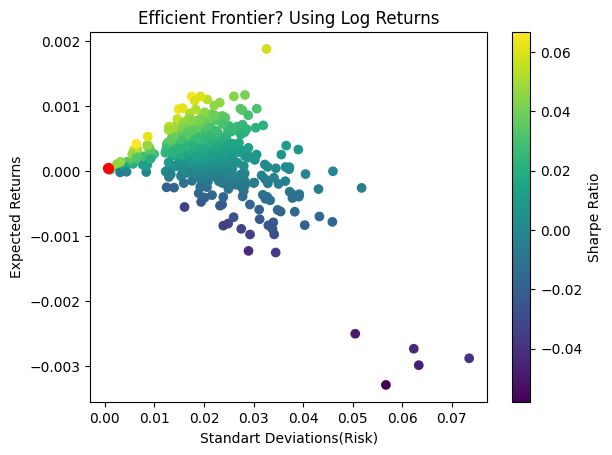

In [176]:
plt.scatter(log_risks, log_returns, c=log_returns / log_risks, cmap="viridis")
plt.colorbar(label='Sharpe Ratio')

#Optimal Portfolio
plt.scatter(log_optimal_risk, log_optimal_return, color='red', marker='o', s=50, label="Optimal Portfolio")

plt.xlabel('Standart Deviations(Risk)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier? Using Log Returns')

plt.show()

Same shit using simple returns

In [168]:
returns = simple_mean_returns.values
risks = np.sqrt(simple_cov_matrix.values.diagonal())
optimal_return, optimal_risk = portfolio_performance(optimal_weights, simple_mean_returns, simple_cov_matrix)

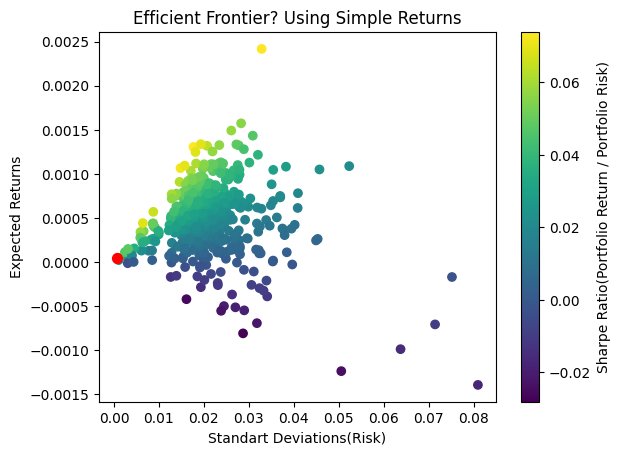

In [175]:
plt.scatter(risks, returns, c= returns / risks, cmap="viridis")
plt.colorbar(label='Sharpe Ratio(Portfolio Return / Portfolio Risk)')
plt.scatter(optimal_risk, optimal_return, color='red', marker='o', s=50, label="Optimal Portfolio")

plt.xlabel('Standart Deviations(Risk)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier? Using Simple Returns')

plt.show()

Forget everything before


Text(0.5, 1.0, 'Markowitz Bullet and Efficient Frontier')

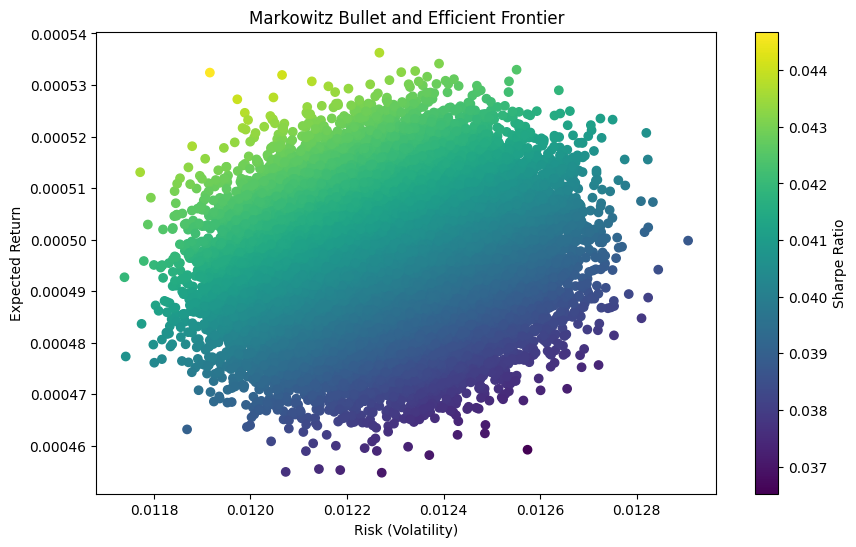

In [185]:
# num_assets
# simple_mean_returns
# simple_cov_matrix

# Generate random portfolios
num_portfolios = 50000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)  # Normalize weights

    portfolio_return = np.sum(weights * simple_mean_returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(simple_cov_matrix, weights)))

    results[0, i] = portfolio_return
    results[1, i] = portfolio_risk
    results[2, i] = portfolio_return / portfolio_risk  # Sharpe ratio

# Plot the Markowitz Bullet
plt.figure(figsize=(10, 6))
plt.scatter(results[1], results[0], c=results[2], cmap='viridis', marker='o')  # Risk vs Return
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Risk (Volatility)")
plt.ylabel("Expected Return")
plt.title("Markowitz Bullet and Efficient Frontier")

That 1+R thing?

In [ ]:
num_assets
simple_mean_returns
simple_cov_matrix

In [214]:
simple_returns.iloc[:365]

,CSCO.close,UAL.close,TROW.close,ISRG.close,PRGO.close,TPR.close,DVN.close,MRO.close,BA.close,VRTX.close,...,TSS.close,CRM.close,PGR.close,WAT.close,BWA.close,LRCX.close,NWL.close,UAA.close,BLK.close,PPL.close
date,,,,,,,,,,,,,,,,,,,,,
2016-11-02,-0.002955,0.002500,-0.009557,-0.004703,-0.021133,-0.032987,0.049350,-0.036923,-0.011657,0.001541,...,-0.012368,-0.005964,-0.004796,-0.007349,-0.014461,-0.002082,-0.010592,0.008847,-0.006892,-0.002646
2016-11-03,-0.002303,-0.003563,0.007594,0.010097,-0.035702,-0.004795,0.024274,0.107201,-0.005186,-0.003974,...,-0.003490,-0.011467,0.007391,0.002712,-0.015247,-0.006365,-0.000838,-0.015914,0.007472,0.005605
2016-11-04,-0.004286,0.023060,0.000156,-0.002792,0.030519,0.001133,-0.007899,-0.032513,-0.003429,0.016347,...,0.009065,0.003102,-0.007656,0.009138,-0.004087,-0.002520,-0.001470,0.016502,0.013660,-0.002346
2016-11-07,0.024844,0.022715,0.009890,0.010441,0.019055,0.026318,0.040557,0.033606,0.025011,0.053951,...,0.008167,0.025951,0.010927,0.016300,0.033146,0.036947,0.034076,0.014935,0.034240,0.015578
2016-11-08,0.001938,0.013326,-0.008704,0.009875,-0.040018,-0.006343,0.003827,0.007067,0.001832,-0.002764,...,0.006075,0.003277,0.016854,0.006130,0.004260,0.006193,0.025426,0.002239,-0.011604,0.005497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-11,-0.001883,-0.040243,-0.005059,-0.015715,-0.024524,-0.011493,0.004164,0.026967,-0.022310,-0.014147,...,-0.011107,-0.002762,-0.006625,-0.013230,0.003774,0.003447,0.003484,-0.004756,-0.016200,0.008671
2018-04-12,0.021447,0.018961,0.017421,0.007109,-0.013180,0.004193,-0.026971,0.006276,0.030914,0.019447,...,0.009931,0.018798,0.008502,0.008423,0.006765,0.025690,-0.006174,0.017921,0.014658,-0.013963
2018-04-13,-0.007844,0.006657,-0.008701,-0.001011,-0.001113,-0.003228,0.023456,0.030063,-0.024298,-0.003642,...,0.000702,-0.019687,-0.007109,0.000000,-0.013254,-0.011067,-0.001554,-0.032277,-0.015459,0.009075


In [233]:
weights_df.iloc[0:100]

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,500,501,502,503,504
0,0.000839,0.003657,0.003314,0.000473,0.003714,0.001872,0.003116,0.000035,0.000811,0.002452,...,0.001409,0.001881,0.002877,0.003528,0.001992,0.000391,0.002375,0.003667,0.000452,0.002545
1,0.003065,0.000107,0.002257,0.001240,0.001220,0.001273,0.003422,0.003831,0.000126,0.000093,...,0.000467,0.000880,0.000714,0.003519,0.000357,0.003630,0.003125,0.003038,0.003891,0.000456
2,0.002770,0.000906,0.002176,0.002386,0.003337,0.003450,0.003866,0.003214,0.001077,0.001318,...,0.000506,0.000864,0.001659,0.003776,0.003017,0.001873,0.001937,0.000077,0.002429,0.003605
3,0.002323,0.002908,0.001042,0.001929,0.003408,0.003006,0.002788,0.003025,0.000942,0.002803,...,0.003223,0.002852,0.003429,0.003588,0.001833,0.000897,0.000730,0.003571,0.001344,0.001016
4,0.002521,0.004050,0.003749,0.000330,0.000527,0.001699,0.000425,0.001130,0.003297,0.000545,...,0.002274,0.003436,0.000805,0.001082,0.001569,0.001692,0.000087,0.000048,0.001441,0.003735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.002405,0.002300,0.003378,0.002812,0.001879,0.002307,0.001952,0.000141,0.001953,0.000938,...,0.002061,0.003804,0.001573,0.001041,0.001517,0.003080,0.000337,0.002350,0.002355,0.003640
96,0.003296,0.001807,0.001448,0.001294,0.002366,0.002464,0.000521,0.003587,0.000120,0.003496,...,0.000252,0.001489,0.000251,0.002668,0.002852,0.001215,0.002673,0.000755,0.001229,0.001009
97,0.000545,0.000252,0.003251,0.003073,0.003176,0.002828,0.002191,0.002295,0.001844,0.003476,...,0.000243,0.000234,0.000261,0.002488,0.001405,0.001035,0.001733,0.002423,0.001134,0.000897
98,0.002130,0.001854,0.001659,0.001720,0.003391,0.000126,0.003499,0.003690,0.000345,0.001774,...,0.003482,0.003638,0.000245,0.000346,0.001739,0.001929,0.001959,0.000784,0.000331,0.002196


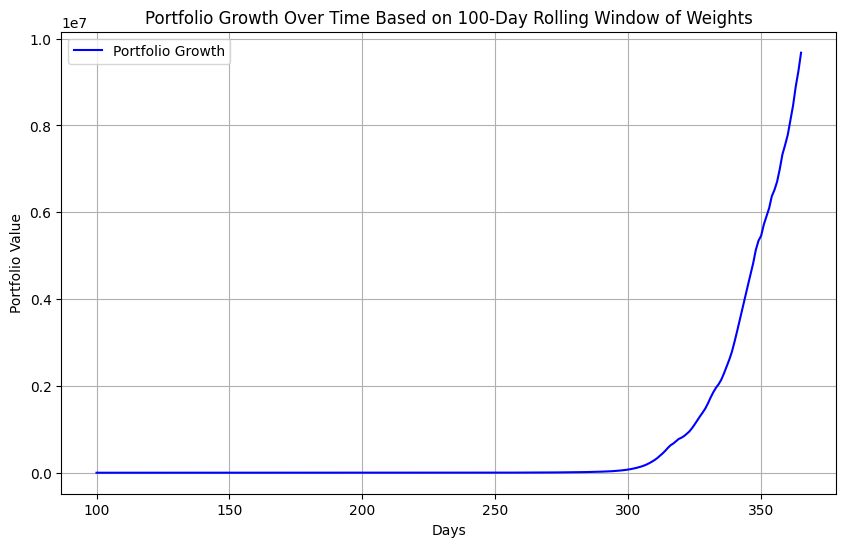

In [242]:
returns_df = simple_returns.iloc[:365]

# Simulate daily portfolio weights for 500 assets over 365 days (replace with your actual data)
weights_df = pd.DataFrame(np.random.rand(365, 505))  # Simulated daily weights
weights_df = weights_df.div(weights_df.sum(axis=1), axis=0)  # Normalize to make sure they sum to 1

# Initialize the portfolio value (starting with 1)
portfolio_value = [1]

# Define the window size (100 days)
window_size = 100

# Calculate portfolio returns and track portfolio growth over rolling windows
for t in range(window_size, len(returns_df)):
    # Get the weights and returns for the current 100-day window
    window_weights = weights_df.iloc[t-window_size:t]
    window_returns = returns_df.iloc[t-window_size:t]

    # Calculate daily portfolio return for each day in the window
    portfolio_daily_returns = np.sum(window_weights.values * window_returns.values) # Daily weighted return
    
    # Calculate the cumulative return for this 100-day window
    # window_return = np.prod(1 + portfolio_daily_returns) - 1  # Cumulative return over the window
    
    # Update portfolio value
    portfolio_value.append(portfolio_value[-1] * (1 + portfolio_daily_returns))


# Convert portfolio_value list to numpy array for easier handling
portfolio_value = np.array(portfolio_value)

# Plot the cumulative portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(range(window_size, len(portfolio_value)+window_size), portfolio_value, label='Portfolio Growth', color='blue')
plt.title("Portfolio Growth Over Time Based on 100-Day Rolling Window of Weights")
plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True)
plt.show()



In [215]:
portfolio_value

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [218]:
weights_df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.001667,0.000696,0.002980,0.000082,0.001659,0.002047,0.002406,0.003486,0.003476,0.001413,...,0.000580,0.000697,0.002709,0.001436,0.004019,2.638350e-03,0.001028,0.000266,0.001470,0.001767
1,0.002529,0.001169,0.002299,0.000769,0.003704,0.002695,0.000920,0.000382,0.003546,0.001826,...,0.003513,0.000288,0.002774,0.001509,0.000236,3.640846e-03,0.003251,0.003587,0.001168,0.003664
2,0.002296,0.001656,0.001714,0.001810,0.000498,0.001641,0.000166,0.003346,0.003004,0.002125,...,0.003654,0.003827,0.000090,0.002276,0.000764,3.612220e-03,0.003317,0.001333,0.000455,0.002155
3,0.002760,0.000344,0.003266,0.001672,0.003878,0.002091,0.001984,0.003636,0.003062,0.003100,...,0.003794,0.002096,0.000068,0.001268,0.003351,1.442935e-03,0.000372,0.001160,0.000669,0.001110
4,0.001396,0.000567,0.003015,0.001031,0.000905,0.001039,0.001761,0.000007,0.001984,0.003477,...,0.000677,0.001530,0.001108,0.003747,0.000470,1.490915e-03,0.002628,0.001606,0.000621,0.001516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.002665,0.000228,0.000962,0.003434,0.000020,0.000405,0.002418,0.002794,0.002186,0.003891,...,0.003340,0.001049,0.002726,0.003457,0.003083,9.370396e-07,0.001595,0.002216,0.004077,0.001910
361,0.000876,0.002445,0.000210,0.000048,0.002468,0.003299,0.002475,0.002657,0.002851,0.003389,...,0.002911,0.002253,0.001754,0.002737,0.002210,3.070803e-03,0.001893,0.001417,0.002793,0.002887
362,0.004053,0.000606,0.002973,0.003324,0.002204,0.003613,0.003447,0.003017,0.004199,0.003751,...,0.001778,0.002317,0.001133,0.000935,0.001178,2.425941e-03,0.000062,0.002301,0.001810,0.000211
363,0.000558,0.003666,0.001068,0.003625,0.003848,0.000232,0.001735,0.003261,0.000680,0.002315,...,0.001439,0.002709,0.004063,0.001442,0.000034,1.694809e-03,0.000702,0.003213,0.002513,0.000206


In [ ]:
x = np.array([[1, 2],
          [3, 4]]) *\
          np.array([[1, 2],
                    [5, 6]])

In [236]:
x

array([[ 1,  4],
       [15, 24]])

In [239]:
np.sum(x, axis=1)

array([ 5, 39])